In [3]:
from models import resnet15v2
from train import get_dataloaders, evaluate
import torch
import torch.nn as nn
from torchsummary import summary

In [4]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Adam Optimizer with 50 Epochs

In [6]:
# Load the model
model = resnet15v2()
model.load_state_dict(torch.load('expt_50_adam/best.pth', map_location=device))
model = model.to(device)

### Model Architecture

In [7]:
summary(model, (2, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,152
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
          Identity-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
       BasicBlock-14           [-1, 64,

In [8]:
train_loader, test_loader = get_dataloaders(batch_size=512)
criterion = nn.BCEWithLogitsLoss()

### Evaluation

In [9]:
test_acc, test_loss = evaluate(model, criterion, test_loader, device)
print('Test accuracy: ', test_acc*100, '%')
print('Test loss: ', test_loss)

Test accuracy:  50.43473895582329 %
Test loss:  1.015372067187206


# Adam Optimizer with 20 Epochs

In [10]:
model2 = resnet15v2()
model2.load_state_dict(torch.load('expt_20_adam/best.pth', map_location=device))
model2 = model2.to(device)

### Evaluation

In [11]:
test_acc2, test_loss2 = evaluate(model2, criterion, test_loader, device)
print('Test accuracy: ', test_acc2*100, '%')
print('Test loss: ', test_loss2)

Test accuracy:  75.47791164658635 %
Test loss:  0.5066263087111783


# AdamW optimizer with 20 Epochs

In [12]:
model3 = resnet15v2()
model3.load_state_dict(torch.load('expt_20_adamw/best.pth', map_location=device))
model3 = model3.to(device)

### Evaluation

In [13]:
test_acc3, test_loss3 = evaluate(model3, criterion, test_loader, device)
print('Test accuracy: ', test_acc3*100, '%')
print('Test loss: ', test_loss3)

Test accuracy:  74.68072289156626 %
Test loss:  0.5188913260885032


## Plot

In [14]:
import matplotlib.pyplot as plt

In [15]:
test_accs = [test_acc * 100, test_acc2 * 100, test_acc3 * 100]
test_losses = [test_loss, test_loss2, test_loss3]
model_names = ['expt_50_adam', 'expt_20_adam', 'expt_20_adamw']

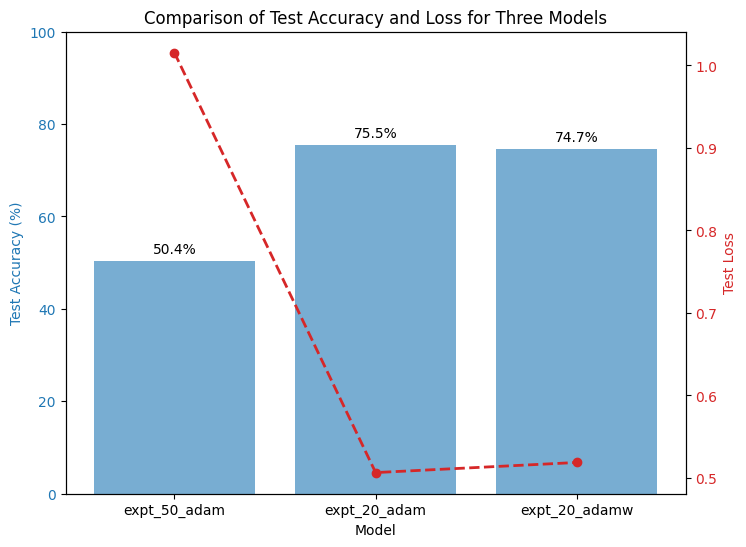

In [16]:
fig, ax1 = plt.subplots(figsize=(8,6))

color_acc = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Test Accuracy (%)', color=color_acc)
bars = ax1.bar(model_names, test_accs, color=color_acc, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color_acc)
ax1.set_ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
    
ax2 = ax1.twinx()
color_loss = 'tab:red'
ax2.set_ylabel('Test Loss', color=color_loss)
ax2.plot(model_names, test_losses, color=color_loss, marker='o', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_loss)

plt.title('Comparison of Test Accuracy and Loss for Three Models')
plt.show()